In [48]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Importing the data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:

print(f"X Train shape {X_train.shape}")
print(f"y Train shape {y_train.shape}")
print(f"X Test shape {X_test.shape}")
print(f"y Test shape {y_test.shape}")


X Train shape (50000, 32, 32, 3)
y Train shape (50000, 1)
X Test shape (10000, 32, 32, 3)
y Test shape (10000, 1)


In [4]:
# The output classes of the CIFAR -10 Dataset according to https://www.cs.toronto.edu/~kriz/cifar.html
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
# Data normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# One - hot encoding the labels / output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# y_test = y_test.reshape(y_test.shape[0])

In [8]:
def plotData(X,y,index):
  plt.figure(figsize=(10,2))
  print(y[index])
  label_index = np.argmax(y[index])
  plt.imshow(X[index])
  plt.xlabel(classes[label_index])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


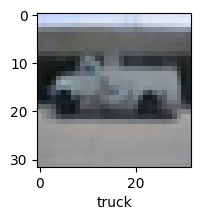

In [9]:
plotData(X_train, y_train ,110)

In [27]:
# ANN
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10,activation='sigmoid')
    ]
)
ann.compile(optimizer='SGD' , loss='categorical_crossentropy' ,metrics=['accuracy'])
# sparse_categorical_crossentropy - when the output is a single values like category - 8
#categorical_crossentrophy - when the output is one hot encoded

In [28]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_6 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_7 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [29]:
ann.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8080 - accuracy: 0.3567
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6230 - accuracy: 0.4264
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5394 - accuracy: 0.4587
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4818 - accuracy: 0.4768
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4330 - accuracy: 0.4965
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3929 - accuracy: 0.5101
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3532 - accuracy: 0.5235
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3182 - accuracy: 0.5368
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2843 - accuracy: 0.5505
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.255

In [42]:
# Accuracy score of the ANN model
# Evaluate on test data

ann_results = ann.evaluate(X_test ,y_test)

print(f"Loss of the ANN model {ann_results[0]}")
print(f"Accuracy of the ANN model {ann_results[1]}")

# from sklearn.metrics import accuracy_score
# y_pred_ann = ann.predict(X_test)
# accuracy_score(y_test, y_pred_ann , normalize=True)


313/313 [==============================] - 1s 2ms/step - loss: 1.7144 - accuracy: 0.5386
Loss of the ANN model 1.71439790725708
Accuracy of the ANN model 0.5386000275611877


In [30]:
# CNN

cnn = models.Sequential(
    [
        layers.Conv2D(filters=32 , kernel_size= (3,3) , activation ='relu' ,input_shape=(32,32,3) ,padding='same'),
        layers.BatchNormalization(),
        

        layers.Conv2D(filters=32 , kernel_size=(3,3), activation='relu' ,padding='same'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(filters=64 , kernel_size= (3,3) , activation ='relu' ),
        layers.BatchNormalization(),
        

        layers.Conv2D(filters=64 , kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Convolution2D(filters=128 , kernel_size= (3,3) , activation ='relu' ),
        layers.BatchNormalization(),
        

        layers.Conv2D(filters=128 , kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),

        layers.Dense(128,activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(10 , activation = 'softmax')
    ]
)
cnn.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [32]:
cnn.fit(X_train,y_train,epochs=50 , batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5149 - accuracy: 0.4597
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0532 - accuracy: 0.6303
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8952 - accuracy: 0.6900
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8031 - accuracy: 0.7239
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7366 - accuracy: 0.7490
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6789 - accuracy: 0.7681
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6374 - accuracy: 0.7814
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6019 - accuracy: 0.7929
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5771 - accuracy: 0.8025
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0

In [43]:
# Accuracy score of the CNN model

cnn_results = cnn.evaluate(X_test ,y_test)

print(f"Loss of the CNN model {cnn_results[0]}")
print(f"Accuracy of the CNN model {cnn_results[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.5106 - accuracy: 0.8476
Loss of the CNN model 0.5106099843978882
Accuracy of the CNN model 0.847599983215332


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


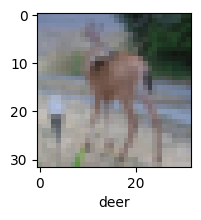

In [34]:
plotData(X_test ,y_test ,100)


In [35]:
# Comparing the results of the classifiers 
y_pred_ann = ann.predict(X_test)
y_pred_cnn = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_pred_ann

array([[8.46211255e-01, 1.76081628e-01, 7.81840861e-01, ...,
        2.84319940e-05, 5.60806930e-01, 1.72563568e-01],
       [7.96643496e-01, 9.87656116e-01, 2.03099787e-01, ...,
        7.63983838e-03, 9.99939799e-01, 9.97498691e-01],
       [9.95324612e-01, 7.11036086e-01, 1.05584316e-01, ...,
        3.68787020e-01, 9.97348666e-01, 9.66278851e-01],
       ...,
       [6.49353713e-02, 8.89111194e-04, 9.80063915e-01, ...,
        5.07385969e-01, 1.71385214e-01, 2.83681042e-02],
       [1.09790660e-01, 5.44322282e-03, 4.93891805e-01, ...,
        1.98169693e-01, 3.14174243e-03, 4.47890498e-02],
       [1.12480901e-01, 5.58931846e-03, 5.94575763e-01, ...,
        9.26541865e-01, 1.17301404e-01, 7.91906059e-01]], dtype=float32)

In [37]:
# Converting the predictions to class labels 
y_classes_truth = [np.argmax(e) for e in y_test]
y_classes_ann = [np.argmax(e) for e in y_pred_ann]
y_classes_cnn = [np.argmax(e) for e in y_pred_cnn]

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_ann[0]
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [44]:
def plotModelResults(X_test,y_test,y_predicted_classes, model_name):
    random_index = np.random.randint(0,len(y_predicted_classes),15)
    fig , axes = plt.subplots(nrows=3 , ncols = 5 , figsize=(9,9), subplot_kw={'xticks':[],'yticks':[]})
    for i , ax in enumerate(axes.flat):
        ax.imshow(X_test[random_index[i]])
        if y_test[random_index[i]] != y_predicted_classes[random_index[i]]:
            color='red'
        else:
            color='green'
        ax.set_title(f"True: {classes[y_test[random_index[i]]]}\n Predicted : {classes[y_predicted_classes[random_index[i]]]}" , color = color)
    plt.show()
    plt.tight_layout()

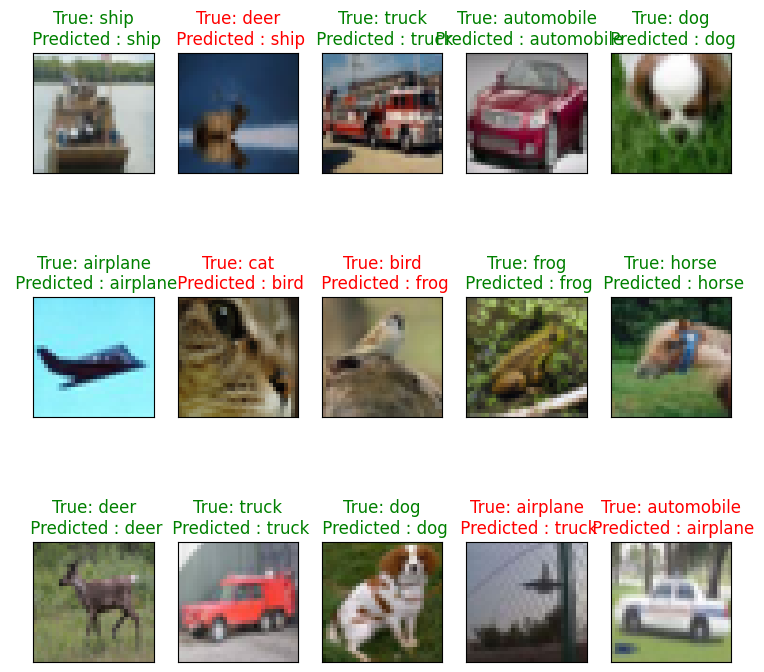

<Figure size 640x480 with 0 Axes>

In [45]:
plotModelResults(X_test,y_classes_truth, y_classes_ann,"ANN")

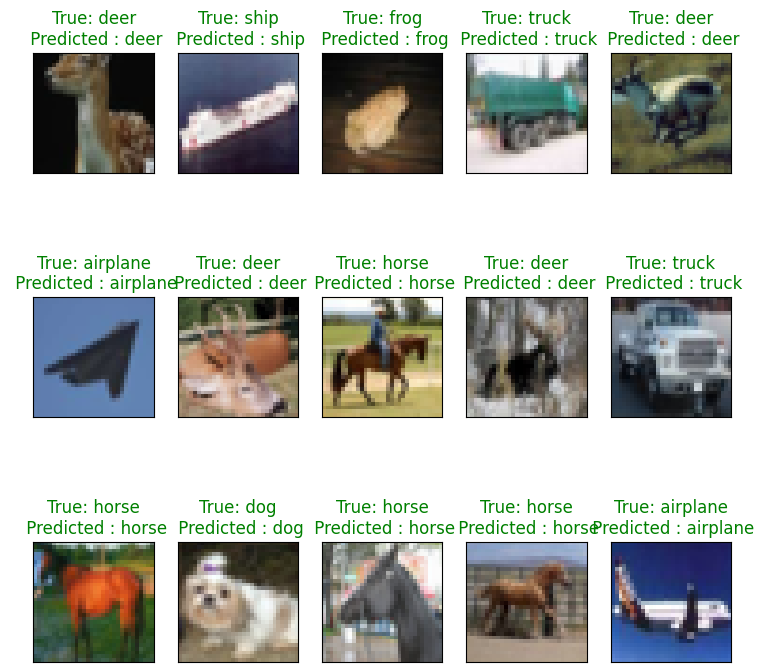

<Figure size 640x480 with 0 Axes>

In [46]:
plotModelResults(X_test,y_classes_truth, y_classes_cnn,"ANN")

In [52]:
# Saving the models
ann.save('models/ann_model.h5')
cnn.save('models/cnn_model.h5')

In [53]:
pickle.dump(ann, open("models_pkl/ann_model.pkl", "wb"))
pickle.dump(cnn,open('models_pkl/cnn_model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://11b2243c-2a33-4fcb-9acc-f8d2eff08208/assets


INFO:tensorflow:Assets written to: ram://11b2243c-2a33-4fcb-9acc-f8d2eff08208/assets


INFO:tensorflow:Assets written to: ram://0aabff88-b5ab-4b81-84f8-afe198218005/assets


INFO:tensorflow:Assets written to: ram://0aabff88-b5ab-4b81-84f8-afe198218005/assets
